In [3]:
import fitsio, glob, healpy as hp
import numpy as np
from striped.job import SinglePointStripedSession as Session, IPythonDisplay


# Find the catalogs for all CCDs in the exposure
filename = sorted(glob.glob('/data/kadrlica/bliss/566500/566500/*_fullcat.fits'))[0]
# Read only the position columns
columns = ['ALPHAWIN_J2000','DELTAWIN_J2000']
# Read each CCD and concatenate into one array
data = fitsio.read(filename,ext=2,columns=columns)


ImportError: No module named striped.job

In [7]:
hpix = hp.ang2pix(nside=16384,theta=data['ALPHAWIN_J2000'],phi=data['DELTAWIN_J2000'],
        lonlat=True, nest=True)

inp = 


array([2778844335, 2778844331, 2778847791, ..., 2778824536, 2778823849,
       2778999340])

In [8]:
f_hpix = np.asarray(hpix, dtype=np.float64)
hpix_1 = np.asarray(f_hpix, dtype=np.int64)

In [9]:
np.any(hpix_1 != hpix)

False

In [10]:
data = fitsio.read(filename,ext=2)

In [11]:
data

array([ (    1, 17,  0.02677512,  1880.48876953,    17.31856155, 1876, 1885,   17,   18,  5.25451392,  0.21708018, -0.01395638,   1.16247999e-09,   2.78825952e-08,   4.11545979e-10,  0.0399527 ,  0.00152576,   1.30189524e-06,   8.16643754e-12,   2.12010878e-10,   2.56445135e-12,  2.5326406 ,  1.32323869, -0.05232429,  0.01074556,  0.01030363,  -2.31881314e-06,   7.05938757e-09,   1.34374733e-08,   3.77269784e-10,   5.49347873e-11,   5.70267165e-11,   1.87765531e-13,  0.79676265,  0.00044955,  1880.57540312,    15.99828818,  0.10366084,  0.10150675,  -0.30062413,  251.67993895, -43.14652584,  251.67980672, -43.14653121,   7.55271049e-06,   7.41067242e-06,   5.08850861, 1880,   17,  251.67990768, -43.14649001,  2.29228115,  0.46587715,  -0.15873829,   0.88219452,  4.92035532,  2.23310161,  16.74892235,   9.29321796e-02, 14, 18,   7.44695896e-08,   9.57466213e-08, [   487.37762451,   2027.9831543 ,   3424.97021484,   4595.95751953,   6441.86181641,   7436.421875  ,   7760.50683594,   7441

In [12]:
len(data)

19312

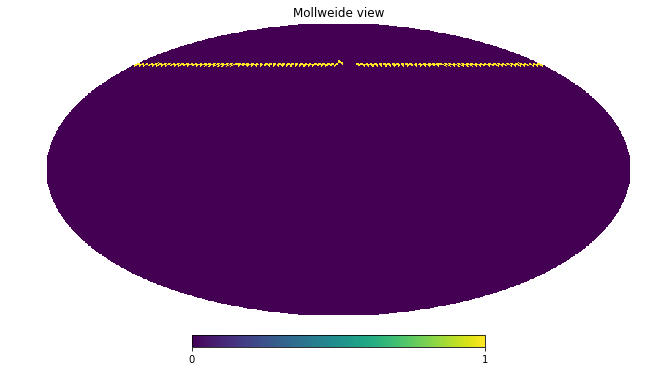

In [4]:
%matplotlib inline
NSIDE=32
npix = hp.nside2npix(NSIDE)
m=np.array([1.0 if i < 1100 and i > 1010 else 0.0 for i in xrange(npix)])
hp.mollview(m)

In [ ]:
import glob
NSIDE=1024
npix = npix = hp.nside2npix(NSIDE)
print npix
m = np.zeros((npix,))

for i, fn in enumerate(glob.glob("/data/kadrlica/y3a2/gold/2.0/healpix/*.fits")):
    data = fitsio.read(fn, columns=["ALPHAWIN_J2000", "DELTAWIN_J2000"])
    hpix = hp.ang2pix(nside=NSIDE,theta=data['ALPHAWIN_J2000'],phi=data['DELTAWIN_J2000'],
        lonlat=True, nest=True)
    m[hpix] = 1.0
    if i and i % 100 == 0:
            print i
            

    
hp.mollview(m, nest=True)    

12582912
100
200
300
400
500
600
700
800
900
1000
1100
1200


In [ ]:
%matplotlib inline

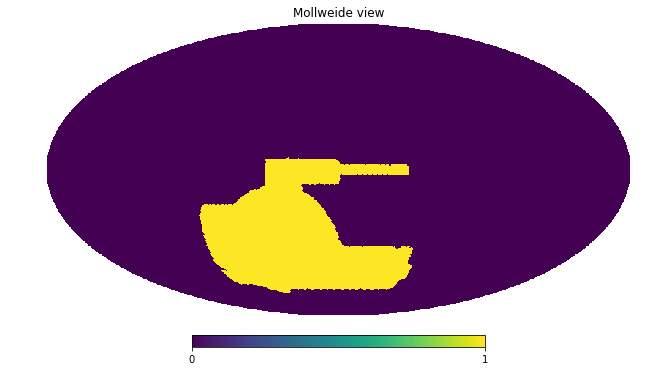

In [22]:
hp.mollview(m, nest=True)    

In [21]:
for i, fn in enumerate(glob.glob("/data/kadrlica/y3a2/gold/2.0/healpix/*.fits")):
    if i > 1500:
        data = fitsio.read(fn, columns=["ALPHAWIN_J2000", "DELTAWIN_J2000"])
        hpix = hp.ang2pix(nside=NSIDE,theta=data['ALPHAWIN_J2000'],phi=data['DELTAWIN_J2000'],
            lonlat=True, nest=True)
        m[hpix] = 1.0
    if i and i % 100 == 0:
            print i
            


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [30]:
bliss_map = np.load("bliss_map.npz")["map"]
type(bliss_map)
bliss_map[bliss_map!=0]

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [1]:
combined_map = m.copy()
combined_map += bliss_map*2

hp.mollview(combined_map, nest=True, title="BLISS observations vs. Y3A2")

NameError: name 'm' is not defined